## Class 2 - Defining evaluation metrics and fitting basic regression models
In our second lecture, we discussed a number of algorithms and evaluation metrics for regression problems. Today, we will go back to the datasets we looked at last week, and implement some of these algorithms and evaluation metrics on the predictive modeling problems we have defined. 

We will do all of this using `scikit-learn`. A couple of useful pointers to useful documentation, before we start:
- In general, the scikit-learn documentation is your friend: https://scikit-learn.org/stable/
- Here is a list of linear models implemented as Extractors/Predictors in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- Here are different forms of neighbor-based models (we talked about `KNNRegressor` yesterday)
- Here are evaluation metrics implemented in sklearn: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics 
- Here are utilities for preprocessing steps: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing 

**Note**: Under `nbs/class_02` you will find a notebook called `example.ipynb`, where I provide an example of how to run today's exercise on simulated data.

### Today's exercise
Gather in the same or similar groups as last week. Under `class/class_02.md` you will find two predictive modeling questions, one for each datasets. There are different variants of the same questions, which differ in which outcome you want to predict.

What I would like you to do today is the following:
1. Create a folder called `group-x` within `nbs/class_02`, `cd` into it and work within that today
2. Choose an outcome variable for a regression problem. On the basis of this, define **which of the evaluation metrics** could be suitable. Evaluation metrics can be computed using scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 
3. (a) If you are in the bike sharing group, split your dataset into a training/validation/test set using later time points as validation/test set. Validation and test set should be 15% of your data each. (b) If you are in the personality group, using sklearn's `train_test_split` function, create a 70/15/15 random split of your data.
    - Remember to set a seed (`random_state`) when you do so. Let's all use the same (the classic `random_state=42`)
    - Save these datasets as separate csv files in a subfolder called `data`
4. Look at your outcome and predictors: do you want to transform them in any way?
5. Estimate the performance of a dummy baseline (i.e., the mean model) on all splits
6. Now look at your predictors: do they need any preprocessing? Any transformations? Removal of "bad" data points?
7. Fit the other models using KKN (sklearn's `KNeighborsRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and linear models (`LinearRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Save the fitted model object (with a meaningful name) using `pickle` (https://scikit-learn.org/stable/model_persistence.html) in a subfolder called `model`.
8. Once you are done, evaluate all models on both the training and the validation set and visualize the scores


### Once you have done this
Please submit a pull request to my repository where, within `nbs/class_02/group-x` you have: 
- the notebook on which you have worked
- a subfolder called `data` containing your splits
- a subfolder called `models` containing your models

In next week's class, I will ask each group to briefly present their results.

In [15]:
# Import np, scikit-learn, and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [32]:
# Import the bike dataset
df = pd.read_csv('data/day.csv')

# Set the dteday column as datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# X = df['temp'].values.reshape(-1, 1)
y = df['cnt'].values.reshape(-1, 1)

# Add multiple features
X = df[['temp', 'hum', 'windspeed']].values.reshape(-1, 3)

<Axes: >

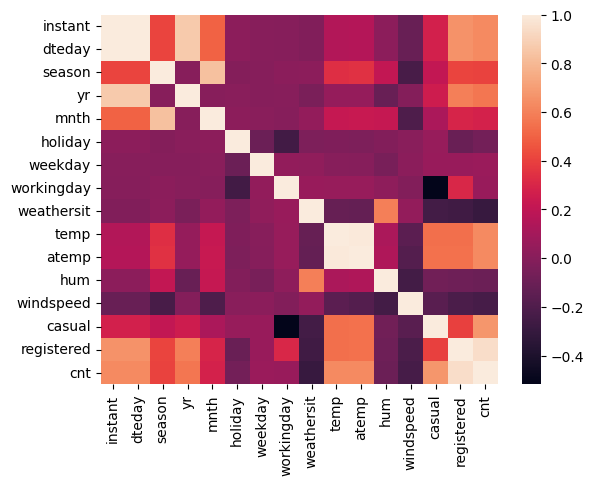

In [31]:
# Plot correlation heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=False)

In [14]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
# Splt with scikit-learn
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

ValueError: x and y must be the same size

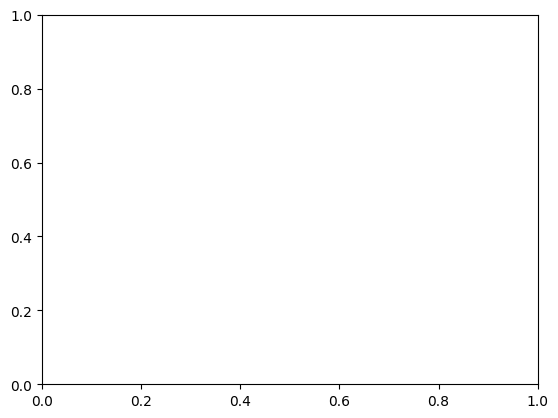

In [34]:
# Run a linear regression
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_val)

# Plot the data
plt.scatter(X_val, y_val, color='black')

# Add the regression line
plt.plot(X_val, y_pred, color='blue', linewidth=3)


In [ ]:
# Get the metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

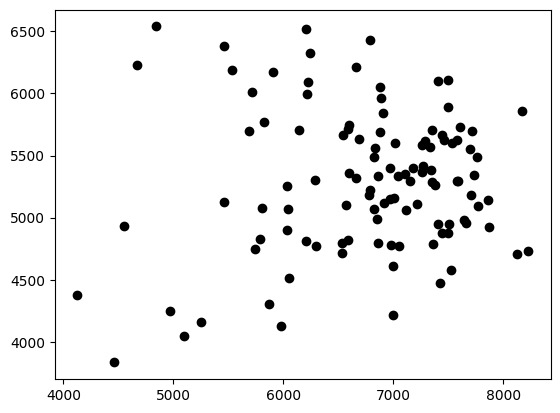

In [37]:
# Run Lasso and Ridge regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Lasso
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict the values
y_pred_lasso = lasso_model.predict(X_val)

In [39]:
# Calculate the residuals
residuals_lasso = y_val - y_pred_lasso

ValueError: x and y must be the same size

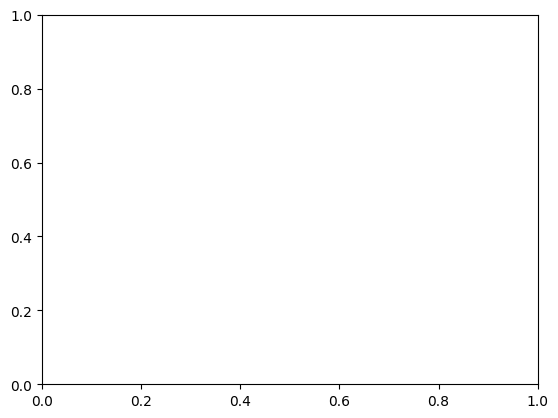

In [40]:
# Plot the residuals
plt.scatter(y_pred_lasso, residuals_lasso, color='black')